# Principal Components Analysis

Principal Components Analysis (PCA) is an unsupervised learning method that can be used to visualize high-dimensional data by transforming it into a lower number of transformed dimensions (principal components). It can also be used to visually inspect for clusters of observations once the data points are described by the transformed dimensions. 

Each new dimension is a linear combination of the original features. In that sense, PCA is not a feature reduction method as each principal component utilizes information from every feature. Also, the principal components are computed in a way that is agnostic to their relationship with the response variable. Instead, the first principal component is calculated such as to fit a hyperplance in an n-dimensional space that minimizes the sum of squared errors between the the data points and the hyperplane.   

In this module we will demonstrate pre-processing steps and useful visualization plots in R. 

(Principal Components Regression and Partial Least squares methods will be discussed separately in the context of supervised learning)

*References:*

+ Introduction to Statistical Learning by James, Witten, Hastie, and Tibshirani
+ Applied Predictive Modeling by Max Kuhn 
+ Blog posts:

https://tgmstat.wordpress.com/2013/11/28/computing-and-visualizing-pca-in-r/

http://www.win-vector.com/blog/2016/05/pcr_part1_xonly/ 

https://github.com/WinVector/Examples/blob/master/PCR/XonlyPCA.Rmd

*Dataset source:*

UCI Machine Learning Respository - Communities and Crime

http://archive.ics.uci.edu/ml/datasets/Communities+and+Crime

The dataset contains 122 features that were considered to have a plausible association with crime rates. Features include information at the community level covering age, race, income, education and housing, among other community characteristics. 

Most of the variables are numeric variables and, therefore, PCA is applicable. 

## Load and examine the data

The data was formatted for loading in Weka. To load the data in R, we first copied the variable names in a csv file (varnames) and the data itself in a text file (crime). After reading in the files into R, we assigned the varnames vector to the crime dataframe in R.

In [2]:
# Load the variable names data
varnames <- read.csv("~/Study projects/PCA/crime_dataset/desc.csv", header=FALSE)[ ,1]
length(varnames)
varnames

[1] 128

[1] state                 county                community            
  [4] communityname         fold                  population           
  [7] householdsize         racepctblack          racePctWhite         
 [10] racePctAsian          racePctHisp           agePct12t21          
 [13] agePct12t29           agePct16t24           agePct65up           
 [16] numbUrban             pctUrban              medIncome            
 [19] pctWWage              pctWFarmSelf          pctWInvInc           
 [22] pctWSocSec            pctWPubAsst           pctWRetire           
 [25] medFamInc             perCapInc             whitePerCap          
 [28] blackPerCap           indianPerCap          AsianPerCap          
 [31] OtherPerCap           HispPerCap            NumUnderPov          
 [34] PctPopUnderPov        PctLess9thGrade       PctNotHSGrad         
 [37] PctBSorMore           PctUnemployed         PctEmploy            
 [40] PctEmplManu           PctEmplProfServ       PctOccupManu         
 [43] PctOccupMgmtProf      MalePctDivorce        MalePctNevMarr       
 [46] FemalePctDiv          TotalPctDiv           PersPerFam           
 [49] PctFam2Par            PctKids2Par           PctYoungKids2Par     
 [52] PctTeen2Par           PctWorkMomYoungKids   PctWorkMom           
 [55] NumIlleg              PctIlleg              NumImmig             
 [58] PctImmigRecent        PctImmigRec5          PctImmigRec8         
 [61] PctImmigRec10         PctRecentImmig        PctRecImmig5         
 [64] PctRecImmig8          PctRecImmig10         PctSpeakEnglOnly     
 [67] PctNotSpeakEnglWell   PctLargHouseFam       PctLargHouseOccup    
 [70] PersPerOccupHous      PersPerOwnOccHous     PersPerRentOccHous   
 [73] PctPersOwnOccup       PctPersDenseHous      PctHousLess3BR       
 [76] MedNumBR              HousVacant            PctHousOccup         
 [79] PctHousOwnOcc         PctVacantBoarded      PctVacMore6Mos       
 [82] MedYrHousBuilt        PctHousNoPhone        PctWOFullPlumb       
 [85] OwnOccLowQuart        OwnOccMedVal          OwnOccHiQuart        
 [88] RentLowQ              RentMedian            RentHighQ            
 [91] MedRent               MedRentPctHousInc     MedOwnCostPctInc     
 [94] MedOwnCostPctIncNoMtg NumInShelters         NumStreet            
 [97] PctForeignBorn        PctBornSameState      PctSameHouse85       
[100] PctSameCity85         PctSameState85        LemasSwornFT         
[103] LemasSwFTPerPop       LemasSwFTFieldOps     LemasSwFTFieldPerPop 
[106] LemasTotalReq         LemasTotReqPerPop     PolicReqPerOffic     
[109] PolicPerPop           RacialMatchCommPol    PctPolicWhite        
[112] PctPolicBlack         PctPolicHisp          PctPolicAsian        
[115] PctPolicMinor         OfficAssgnDrugUnits   NumKindsDrugsSeiz    
[118] PolicAveOTWorked      LandArea              PopDens              
[121] PctUsePubTrans        PolicCars             PolicOperBudg        
[124] LemasPctPolicOnPatr   LemasGangUnitDeploy   LemasPctOfficDrugUn  
[127] PolicBudgPerPop       ViolentCrimesPerPop  
128 Levels: agePct12t21 agePct12t29 agePct16t24 agePct65up ... whitePerCap

In [3]:
# Load the crime data - ? characters coded as NA
crime <- read.csv("~/Study projects/PCA/crime_dataset/crime.txt", header=FALSE, stringsAsFactors=FALSE, na.strings="?")
paste('There are ', dim(crime)[1], 'observations and ', dim(crime)[2], 'variables')
if (dim(crime)[1] != 1994 | dim(crime)[2]!=128) {
    print("Check data load - number of observations or variables is not as expected")
} else {
        print("Data is loaded correctly")
} 
head(crime)

[1] "There are  1994 observations and  128 variables"

[1] "Data is loaded correctly"


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128
8,NA,NA,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
53,NA,NA,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NA,NA,NA,NA,0.00,NA,0.67
24,NA,NA,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NA,NA,NA,NA,0.00,NA,0.43
34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NA,NA,NA,NA,0.00,NA,0.12
42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NA,NA,NA,NA,0.00,NA,0.03
6,NA,NA,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,NA,NA,NA,NA,0.00,NA,0.14


In [4]:
# Assign the varnames to the crime dataframe
colnames(crime) <- varnames
head(crime)
dim(crime)

state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
8,NA,NA,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
53,NA,NA,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NA,NA,NA,NA,0.00,NA,0.67
24,NA,NA,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NA,NA,NA,NA,0.00,NA,0.43
34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NA,NA,NA,NA,0.00,NA,0.12
42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NA,NA,NA,NA,0.00,NA,0.03
6,NA,NA,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,NA,NA,NA,NA,0.00,NA,0.14


[1] 1994  128

In [5]:
# Extract the response variable, ViolentCrimePerPop, in a separate vector
crime.rate <- crime[ ,128] 
crime <- crime[ ,-128]
dim(crime)

[1] 1994  127

In [6]:
# The first 5 variables do not have predictive value and only serve to uniquely identify the community - we remove them
crime <- crime[ , c(6:dim(crime)[2])]
dim(crime)
# Next, check that the remaining variables are all numeric
num.check <- any(sapply(crime,is.numeric) == FALSE)  
paste("If all variables are numeric, the output should be FALSE. Check output:", num.check)

[1] 1994  122

[1] "If all variables are numeric, the output should be FALSE. Check output: FALSE"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.070   0.150   0.238   0.330   1.000 

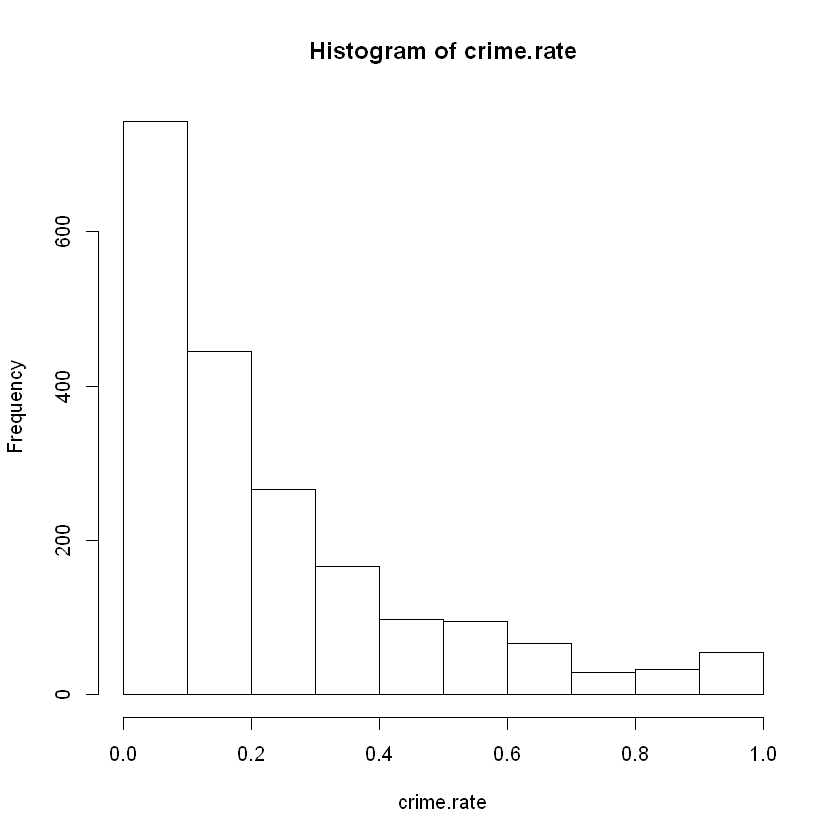

In [7]:
# Examine the data structure
summary(crime.rate)
hist(crime.rate)

In [8]:
summary(crime)

   population      householdsize     racepctblack     racePctWhite   
 Min.   :0.00000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.01000   1st Qu.:0.3500   1st Qu.:0.0200   1st Qu.:0.6300  
 Median :0.02000   Median :0.4400   Median :0.0600   Median :0.8500  
 Mean   :0.05759   Mean   :0.4634   Mean   :0.1796   Mean   :0.7537  
 3rd Qu.:0.05000   3rd Qu.:0.5400   3rd Qu.:0.2300   3rd Qu.:0.9400  
 Max.   :1.00000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
                                                                     
  racePctAsian     racePctHisp     agePct12t21      agePct12t29    
 Min.   :0.0000   Min.   :0.000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0400   1st Qu.:0.010   1st Qu.:0.3400   1st Qu.:0.4100  
 Median :0.0700   Median :0.040   Median :0.4000   Median :0.4800  
 Mean   :0.1537   Mean   :0.144   Mean   :0.4242   Mean   :0.4939  
 3rd Qu.:0.1700   3rd Qu.:0.160   3rd Qu.:0.4700   3rd Qu.:0.5400  
 Max.   :1.0000   Max.   :1.000 

### A couple of observations about the data:

+ All numeric variables are bounded between 0 and 1. After reading the data description carefully, it becomes clear that all numeric data was normalized into the decimal range 0.00-1.00 and then discretized using an Unsupervised, equal-interval binning method. The determination of the bin value was not discussed, but it is stated that attributes retain their distribution and skew (as confirmed by the histogram for crime.rate above). Therefore, the usual scaling step does not have to be applied prior to computing the PCs since all variables are measured on the same scale, from 0.00 to 1.00. 

+ Variables starting with Lemas in their names have the same number of missing observations, 1675, leaving only 1994-1675=319 observations with data. As explained in the data description, the LEMAS survey was primarily administered to larger police departments and many communities are missing LEMAS data. Given the large proportion of missing LEMAS data, we could either 1) limit the dataset to only those communities with available LEMAS data, which reduces the dataset to 319 observations; or 2) exclude the LEMAS variables from the dataset. Without prior contextual knowledge to inform the decision, we could explore both options. However, for purposes of this excerise we will assume that the LEMAS variables contain important signal and proceed with option 2).  

In [9]:
# Keep only observations with available LEMAS data:
crime <- subset(crime, (!is.na(crime$LemasSwornFT)))
dim(crime)
if (dim(crime)[1]<dim(crime)[2]) print("The number of observations is LESS THAN the number of variables")
    
# Keep the corresponding crime rate observations
tokeep <- which(!(is.na(crime$LemasSwornFT)))
crime.rate <- crime.rate[tokeep]
length(crime.rate)

[1] 319 122

[1] 319

In [10]:
require(ggplot2)

Loading required package: ggplot2


## Compute the PCs

There are two functions in R that compute the principal components. 
* *princomp* uses eigen decomposition and works only when the number of observations is greater than the number of features. 

* *prcomp* uses singular value decomposition (SVD) and is the preferred method because it is numerically more stable and can be applied to wide datasets (where the number of features exceeds the number of observations). 

We will use *prcomp*, which also by default centers the variables. As discussed above, we do not need to scale the variables since they are all measured on a scale from 0 to 1.    

In [11]:
pc <- prcomp(crime, scale=TRUE)
summary(pc)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     5.1068 4.4632 3.4735 3.00071 2.75445 2.27103 2.08340
Proportion of Variance 0.2138 0.1633 0.0989 0.07381 0.06219 0.04228 0.03558
Cumulative Proportion  0.2138 0.3770 0.4759 0.54975 0.61194 0.65422 0.68979
                           PC8     PC9    PC10   PC11    PC12    PC13    PC14
Standard deviation     1.92055 1.84536 1.53790 1.4736 1.30254 1.29683 1.18749
Proportion of Variance 0.03023 0.02791 0.01939 0.0178 0.01391 0.01378 0.01156
Cumulative Proportion  0.72003 0.74794 0.76733 0.7851 0.79903 0.81282 0.82438
                          PC15   PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     1.11496 1.0476 1.02372 0.99826 0.97663 0.96454 0.93397
Proportion of Variance 0.01019 0.0090 0.00859 0.00817 0.00782 0.00763 0.00715
Cumulative Proportion  0.83457 0.8436 0.85215 0.86032 0.86814 0.87577 0.88292
                          PC22    PC23    PC24

As expected, *prcomp* calculated 122 PCs, i.e., the smaller of p (number of variables) and n-1 (number of observations less one). 

As an aside, *fortify* is a package that conveniently adds the PC scores as additional columns to the dataframe with the original features.

In [12]:
#install.packages("ggfortify", repos = c(CRAN="https://cran.r-project.org/"))
library(ggfortify) # For fortify()
pc.fortify <- fortify(pc)
head(pc.fortify)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122
1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.032222873,-0.01330541,-0.0001686825,0.032391962,-0.0005898588,0.004931463,0.017115324,-0.005960130,-0.0117890466,8.307522e-05
17,0.15,0.31,0.40,0.63,0.14,0.06,0.58,0.72,0.65,0.47,...,0.043959946,0.05159654,0.0308047629,0.005696376,0.0091422069,-0.008363946,0.003031723,0.002218141,-0.0001473669,-3.195727e-04
21,0.25,0.54,0.05,0.71,0.48,0.30,0.42,0.48,0.28,0.32,...,-0.003551687,-0.02239379,-0.0038534411,-0.011335479,-0.0243697358,0.019353881,0.009747820,-0.000281766,-0.0105437067,-5.382938e-04
22,1.00,0.42,0.47,0.59,0.12,0.05,0.41,0.53,0.34,0.33,...,0.088963777,-0.01257605,0.0076797371,0.043409359,-0.0081100177,-0.008085961,-0.015288309,0.019812731,0.0005404360,2.299479e-03
24,0.11,0.43,0.04,0.89,0.09,0.06,0.45,0.48,0.31,0.46,...,-0.023517265,-0.01344240,-0.0190773832,0.030023153,0.0112131178,-0.003130134,-0.028072548,0.001328322,0.0066040564,-1.492538e-04
34,0.09,0.43,0.51,0.58,0.04,0.01,0.58,0.56,0.50,0.52,...,-0.030629015,-0.02031043,-0.0246364519,0.019465593,0.0087910326,-0.035756076,0.022647875,0.015724872,-0.0106399918,1.068558e-03


## Visualization of variance explained

The first PC explains about 21% of the variance in the data, the second - 16% and so on. We can visualize the variance of each PC (i.e., square of the standard deviation displayed above) as follows:

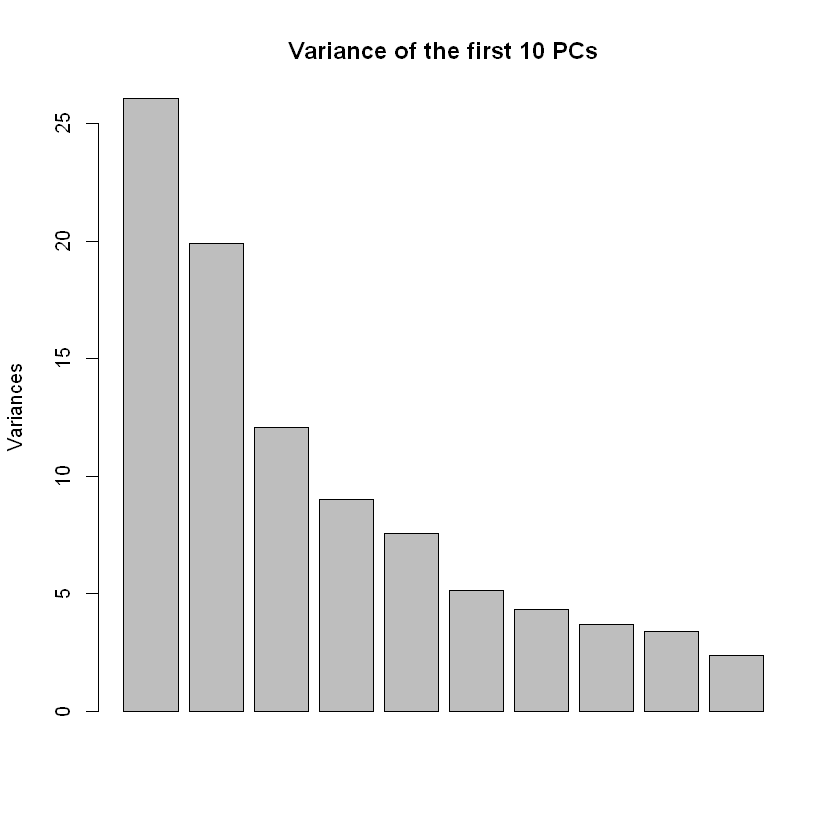

In [13]:
plot(pc, main="Variance of the first 10 PCs")

After the first two PCs, each subsequent PC has a much smaller variance than the first two. To better understand if it is sufficient to study only the first two PCs, we need to examine the cumulative Percent of Variance Explained (PVE) by first few PCs. One rule of thumb for data reduction is to preserve the first PCs that explain at least 80% of the total variance in the data. 

We can plot the Percent of Variance Explained (PVE) to display the cumulative variance distribution.

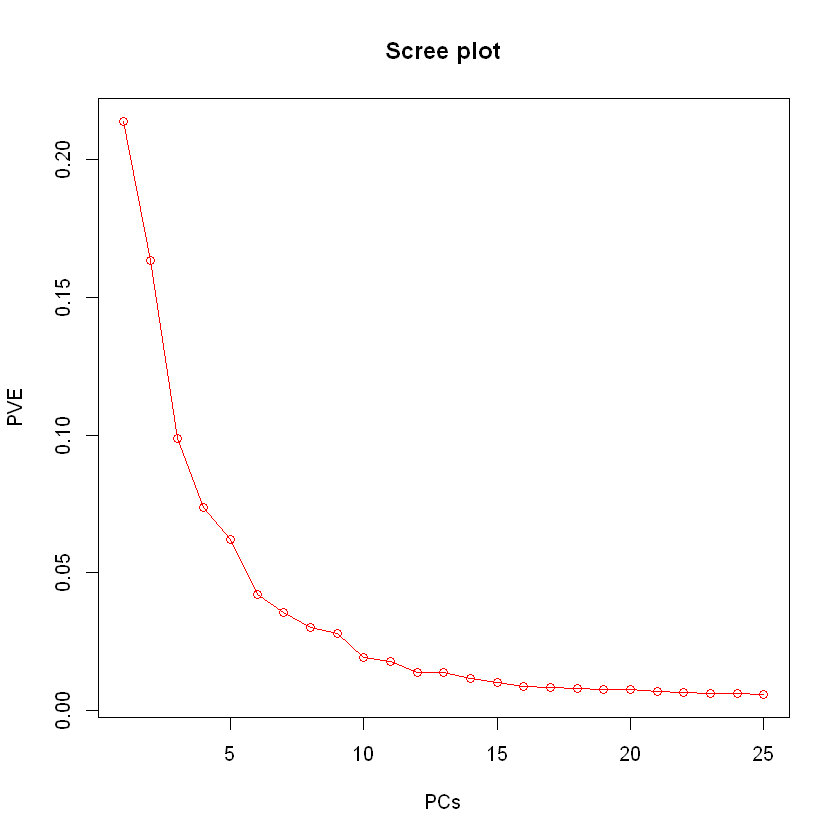

In [14]:
# Calculate PVE for each PC
pve <- pc$sdev^2/sum(pc$sdev^2)
# Draw a "Scree plot", which shows how quickly the PVE of each subsequent PC declines
plot(pve[1:25], type="o", ylab="PVE", xlab="PCs", col="red", main="Scree plot")


The "elbow" in the graph appears to be around the tenth PC. 

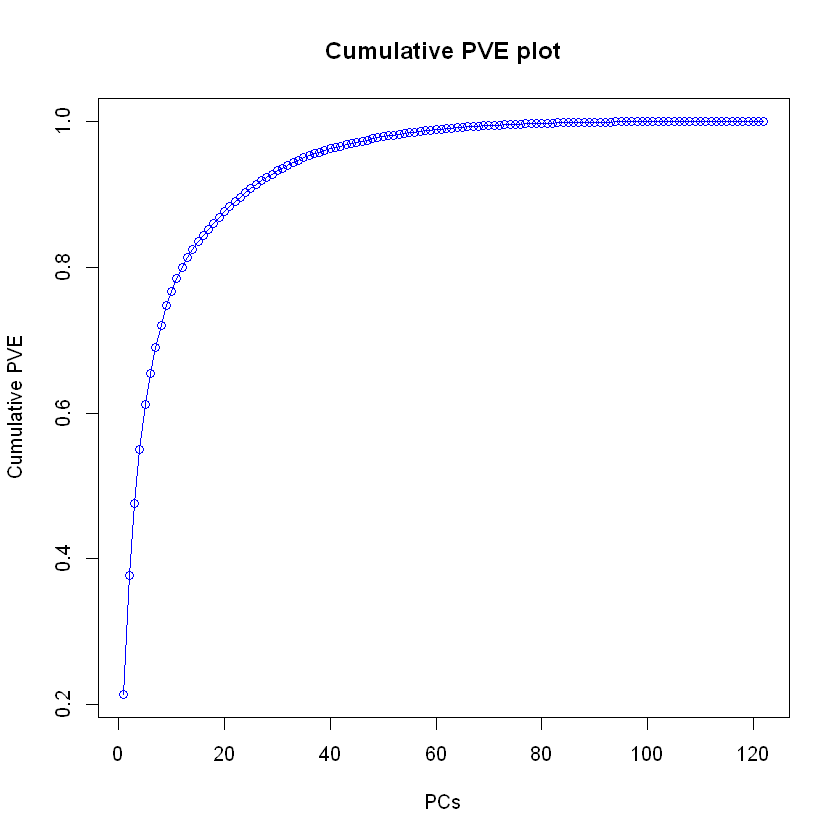

In [15]:
# Plot the Cumulative PVE, which helps illustrate how many PCs are needed to explain at least 80% of the variation in the data
plot(cumsum(pve), type="o", ylab="Cumulative PVE", xlab="PCs", col="blue", main="Cumulative PVE plot")

It takes a little over 10 PCs to explain around 80% of the variance in the data, consistent with the "elbow" in the scree plot.

## Biplot and ggbiplot

A PCA biplot interlays a scatter plot of the observations in the transformed scale and arrows for the loading factors. We will choose the first two PCs for our transformed scale. Below we use the biplot function from the base package. 

### biplot

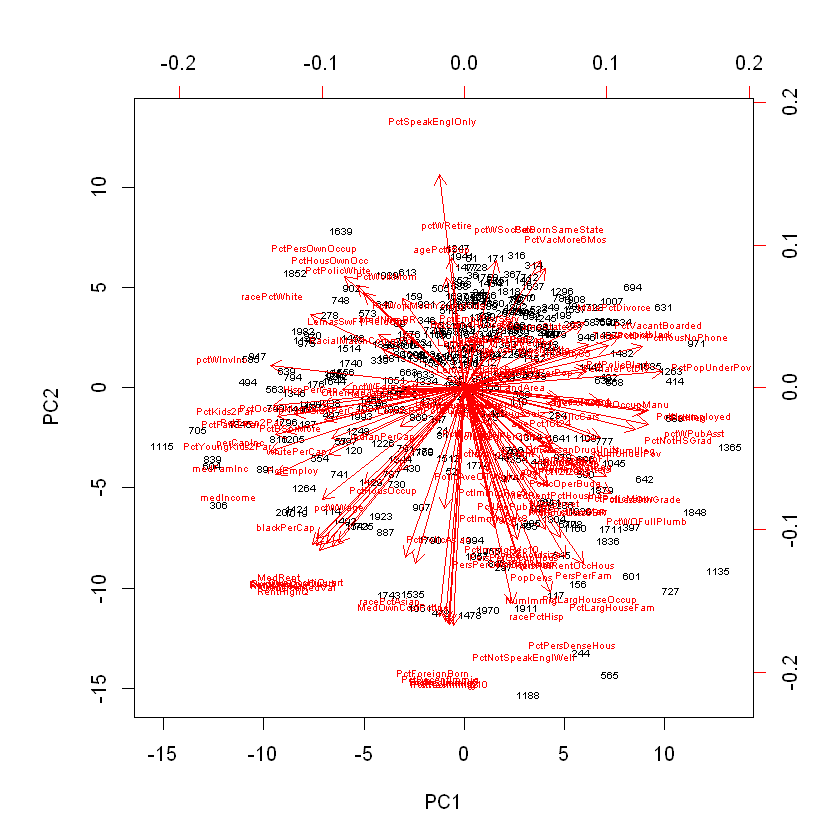

In [18]:
# Biplot of the first two PCs where we will display the text labels in a smaller font through cex
biplot(pc, scale=0, choices=c(1,2), cex=.5) 

### Interpreting a PCA biplot
The PCA biplot has four axes: 

* The left and bottom axes correspond to the scores associated with the two PCs as shown on the axis label. The observations on the transformed scale are shown in black. 

* The right and top axes correspond to the feature loadings for each PC. The loadings for each feature are shown as red arrows starting from the origin. The arrow length approximates the relative feature variance and the angle between two arrows approximates the pairwise correlation between the features (the closer the arrows are, the higher the correlation).  

As the answer to this query on Stackexchange illustrates (http://stats.stackexchange.com/questions/141085/positioning-the-arrows-on-a-pca-biplot), the biplot function in R scales all arrows down by a factor of 0.80 and displays the text labels where the arrow endpoints should have been. 

Based on the figure above, we can see that *PctSpeakEnglOnly* has one of the highest loadings of PC2 and therefore excercises a lot of influence on the PC2 scores. We also see that *PctNotSpeakEnglWell* and *PctForeignBorn* are highly correlated. 
However, we can not quite read the label of the feature with the largest negative loading on PC2. 

Overall, the biplot function from the base package is not particularly helpful when there is a large number of original features (here more than one hundred) and a large number of observations. An alternative function from the ggbiplot package provides better illustration. 

### ggbiplot 

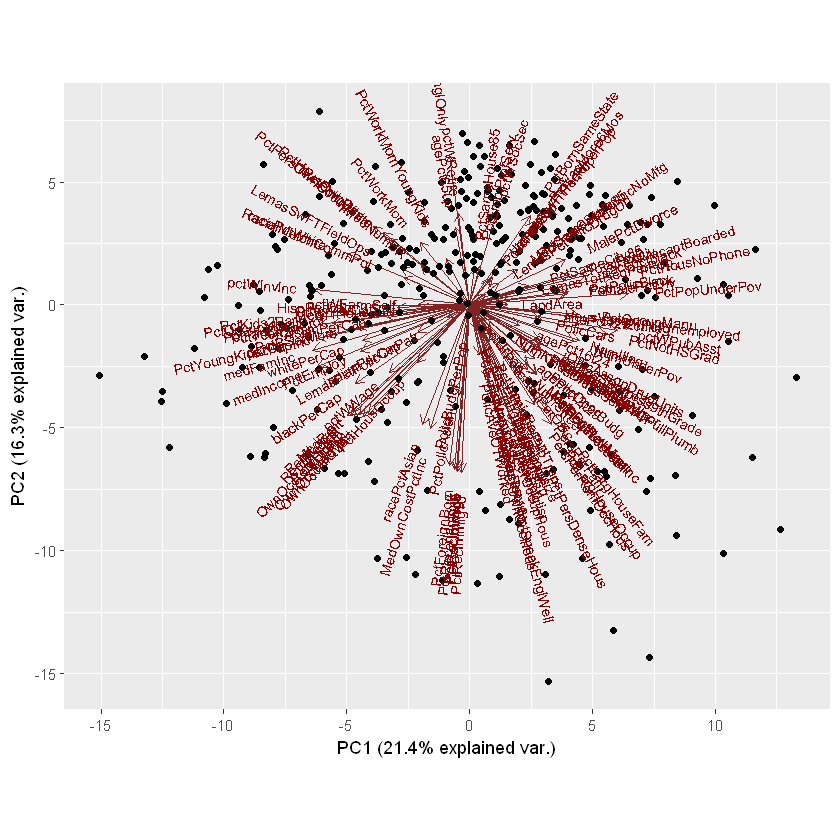

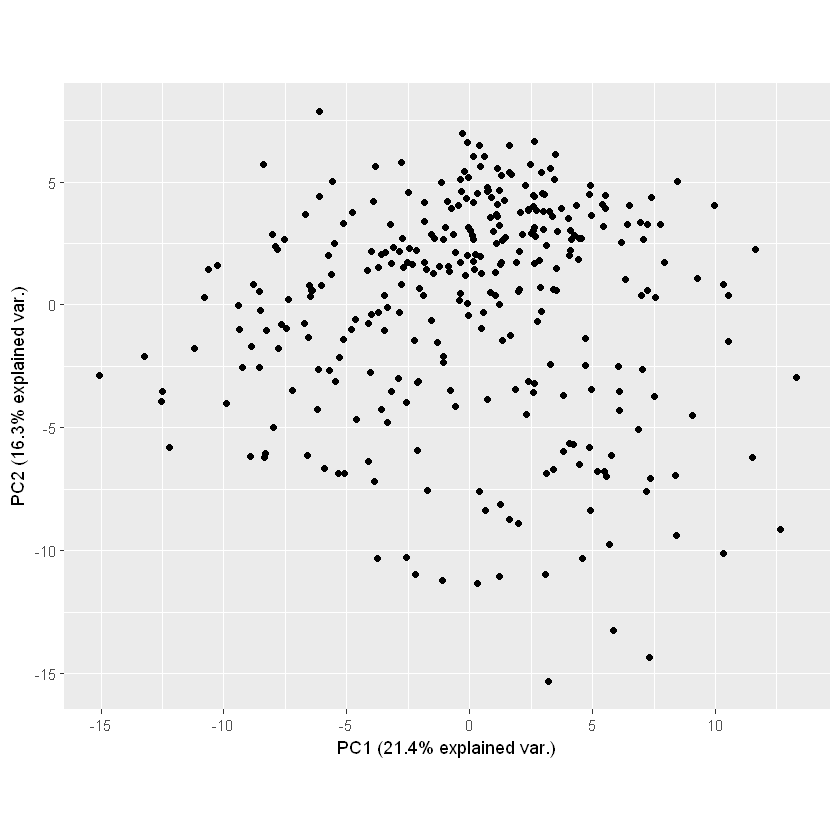

In [22]:
# Load the ggbiplot package
#devtools::install_github("vqv/ggbiplot")
require(ggbiplot)

# Displaying both observations and features
ggbiplot(pc, choices=c(1,2), obs.scale = 1, var.scale = 1, var.axes=TRUE, cex=.5)

# Displaying only the observations (we suppress the features from displaying by setting var.axes=FALSE)
ggbiplot(pc, choices=c(1,2), obs.scale = 1, var.scale = 1, var.axes=FALSE)

Ggbiplot allows us to illustrate only the observations mapped on the transformed scale and inspect for clusters of observations. We can further create a factor variable from the continuous crime rate response variable by assigning each observation to its respective quartile. This will let us see if the chosen PCs are conducive to creating clear segmentation among the different crime rate classes. 

Loading required package: RColorBrewer


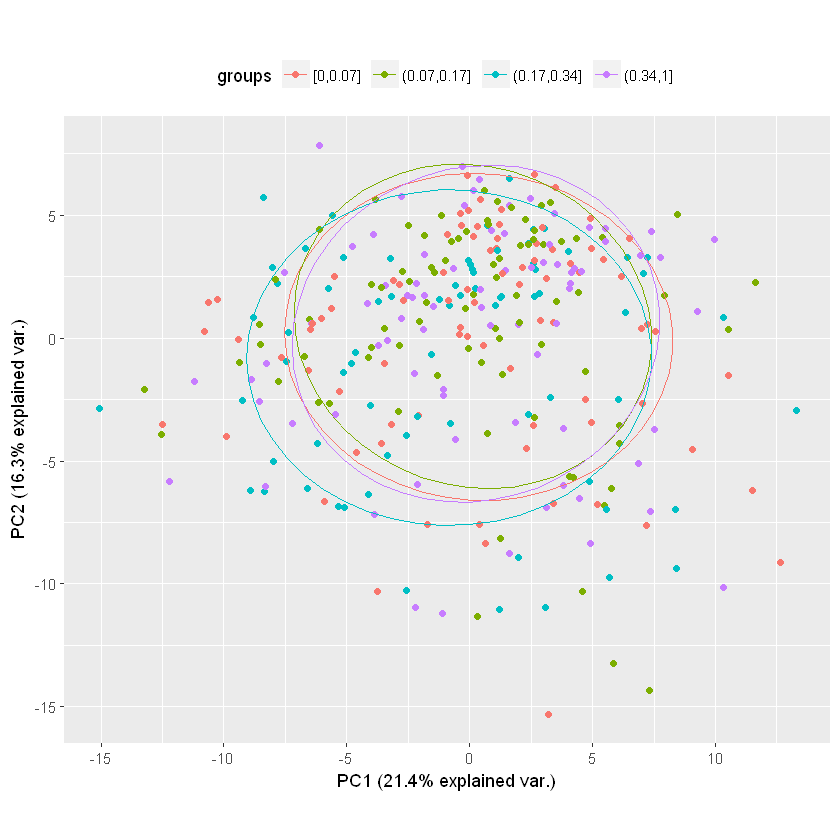

In [23]:
#install.packages("gtools", repos="http://cran.us.r-project.org")

# Represent crime rate as a factor variable - create quartile bins
require(gtools)
require(RColorBrewer)
crime.quartile <- quantcut(crime.rate, q=seq(0,1,by=0.25))

ggbiplot(pc, choices=c(1,2), obs.scale = 1, var.scale = 1, var.axes=FALSE,
         groups = crime.quartile, ellipse = TRUE, circle = TRUE) +
         scale_fill_brewer(palette="Set1") +
         theme(legend.direction = 'horizontal', legend.position = 'top')


Based on the plot above, the first two PCs are not helpful in delineating crime levels. This provides early indication that the use of PCA as a feature reduction method would not be helpful in predicting crime levels. This result is not surprising because the PCs are computed without using any information about the response variable. There exist alternative feature reduction methods that take into account the correlation of the features with the response variable such as Partial Least Squares. These methods are supervised learning methods, which we will study in separate modules.  